In [1]:
# --- a. Import the necessary packages ---

import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

In [2]:
def load_and_preprocess_data(filepath, num_classes=10):

    # 1. Load the dataset
    print(f"Loading data from: {filepath}...")
    data = pd.read_csv(filepath)

    # 2. Separate features (pixels) and target (label)
    X = data.iloc[:, :-1].values.astype('float32') # Pixel data starts from the second column
    y = data['label'].values

    # 3. Normalise the pixel data: Scale to the range [0, 1]
    # MNIST pixels are 0 to 255 (unsigned 8-bit integers)
    X /= 255.0

    # 4. One-hot encode the target labels (e.g., 5 -> [0, 0, 0, 0, 0, 1, 0, 0, 0, 0])
    y = to_categorical(y, num_classes=num_classes)

    return X, y

In [3]:
# --- b. Load the training and testing data ---

X_train, y_train = load_and_preprocess_data('train_data.csv')
X_test, y_test = load_and_preprocess_data('test_data.csv')

Loading data from: train_data.csv...
Loading data from: test_data.csv...


In [4]:
# --- c. Define the network architecture using Keras ---

# The CIFAR-10 image is 32x32x3 = 3072 pixels.
# The Sequential model defines a linear stack of layers.

model = Sequential([
    # Input layer: Flattens the 784-element feature vector
    Flatten(input_shape=(3072,)),

    # First Hidden Layer: A fully-connected layer with 512 neurons and ReLU activation
    Dense(512, activation='relu', name='Hidden_Layer_1'),

    # Second Hidden Layer: A fully-connected layer with 256 neurons and ReLU activation
    Dense(256, activation='relu', name='Hidden_Layer_2'),

    # Output Layer: 10 neurons (for digits 0-9) and Softmax for classification probability
    Dense(10, activation='softmax', name='Output_Layer')
])

C:\Users\Aashlesh\AppData\Roaming\Python\Python313\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [5]:
# Compile the model
# We use categorical crossentropy because the labels are one-hot encoded

model.compile(
    optimizer=SGD(learning_rate=0.01),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Display the model summary
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 3072)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Hidden_Layer_1 (Dense)          │ (None, 512)            │     1,573,376 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Hidden_Layer_2 (Dense)          │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Output_Layer (Dense)            │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,707,274 (6.51 MB)

 Trainable params: 1,707,274 (6.51 MB)

 Non-trainable params: 0 (0.00 B)

In [6]:
# --- d. Train the model using SGD with 11 epochs ---

print("\nStarting model training...")
H = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=11,  # Train for 11 epochs as requested
    batch_size=128,
    verbose=1
)
print("Model training complete.")


Starting model training...
Epoch 1/11
391/391 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.2994 - loss: 1.9808 - val_accuracy: 0.3540 - val_loss: 1.8515
Epoch 2/11
391/391 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.3659 - loss: 1.8062 - val_accuracy: 0.3353 - val_loss: 1.8399
Epoch 3/11
391/391 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.3911 - loss: 1.7349 - val_accuracy: 0.3834 - val_loss: 1.7283
Epoch 4/11
391/391 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.4101 - loss: 1.6830 - val_accuracy: 0.4103 - val_loss: 1.6692
Epoch 5/11
391/391 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.4238 - loss: 1.6443 - val_accuracy: 0.4189 - val_loss: 1.6483
Epoch 6/11
391/391 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.4364 - loss: 1.6130 - val_accuracy: 0.4206 - val_loss: 1.6243
Epoch 7/11
391/391 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.4459 - loss: 1.5856 - val_accuracy: 0.4257 - val_loss: 1.6046
Epoch 8/11
391/391 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.4523 - los

In [7]:
# --- e. Evaluate the network ---

loss, accuracy = model.evaluate(X_test, y_test, verbose=0)

print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy * 100:.2f}%")

Test Loss: 1.5375
Test Accuracy: 45.37%


LOWER ACCUACY IS EXPECTED HERE AS CIFAR-10 IS A MORE COMPLEX DATASET THAN MNIST


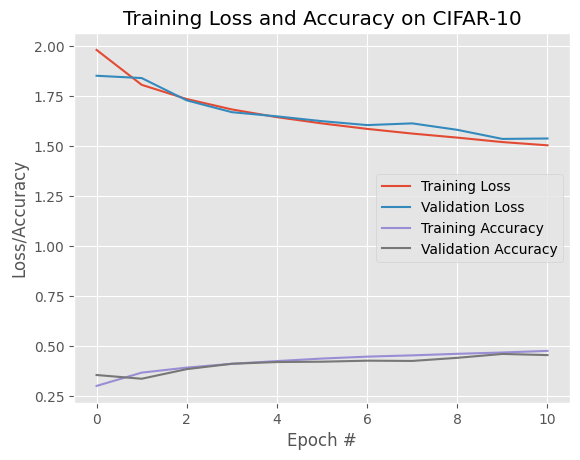

In [8]:
# --- f. Plot the training loss and accuracy ---

plt.style.use("ggplot")
plt.figure()

plt.plot(np.arange(0, 11), H.history["loss"], label="Training Loss")
plt.plot(np.arange(0, 11), H.history["val_loss"], label="Validation Loss")
plt.plot(np.arange(0, 11), H.history["accuracy"], label="Training Accuracy")
plt.plot(np.arange(0, 11), H.history["val_accuracy"], label="Validation Accuracy")

plt.title("Training Loss and Accuracy on CIFAR-10")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend()
plt.show()